<a href="https://colab.research.google.com/github/vanya890/AI_Study_Colab/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B8_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B8_%D0%9A%D1%83%D0%B7%D1%8B%D0%BA_%D0%98%D0%B2%D0%B0%D0%BD_221_327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1

In [42]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений


In [43]:
model = Sequential()
model.add(Dense(3, input_dim=3))
model.add(Dense(1))
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

Задание 2

In [44]:
model = Sequential()
model.add(Dense(3, input_dim=3, use_bias=False))
model.add(Dense(1, use_bias=False))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

Задание 3

In [45]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [46]:
print(x_train_org.shape)
print(y_train_org.shape)
print(x_test_org.shape)
print(y_test_org.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


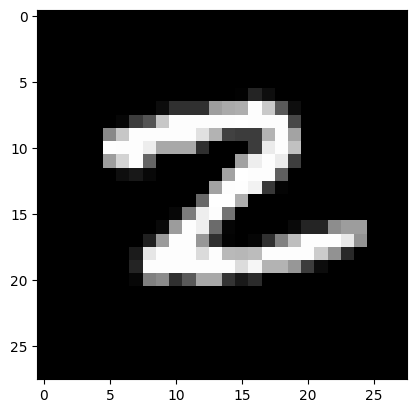

In [47]:
# Номер картинки
n = 143

# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()


In [48]:
# Вывод метки класса для n-го изображения
print(y_train_org[n])


2


Преобразуем в одномерную последовательность чисел (вектор) с помощью метода .reshape():

In [49]:
# Изменение формы  с 28х28 на 784
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')


Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


Теперь каждая картинка представлена последовательностью из 784 чисел (28x28).  Это сглаженные данные изображения, которые извлекаются из mnist.train.nextbatch () .

In [50]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

# Задание константы количества распознаваемых классов

CLASS_COUNT = 10

# Преобразование y в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)
# Вывод примера одного выходного вектора
print(y_train[0])


(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [51]:
# Вывод формы массива меток
print(y_train_org.shape)
# Вывод метки, соответствующей 36-му элементу
print(y_train_org[36])


(60000,)
6


Создание нейронной сети

In [58]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu'))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 400)                 │         320,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           4,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 952,410 (3.63 MB)

 Trainable params: 952,410 (3.63 MB)

 Non-trainable params: 0 (0.00 B)

None


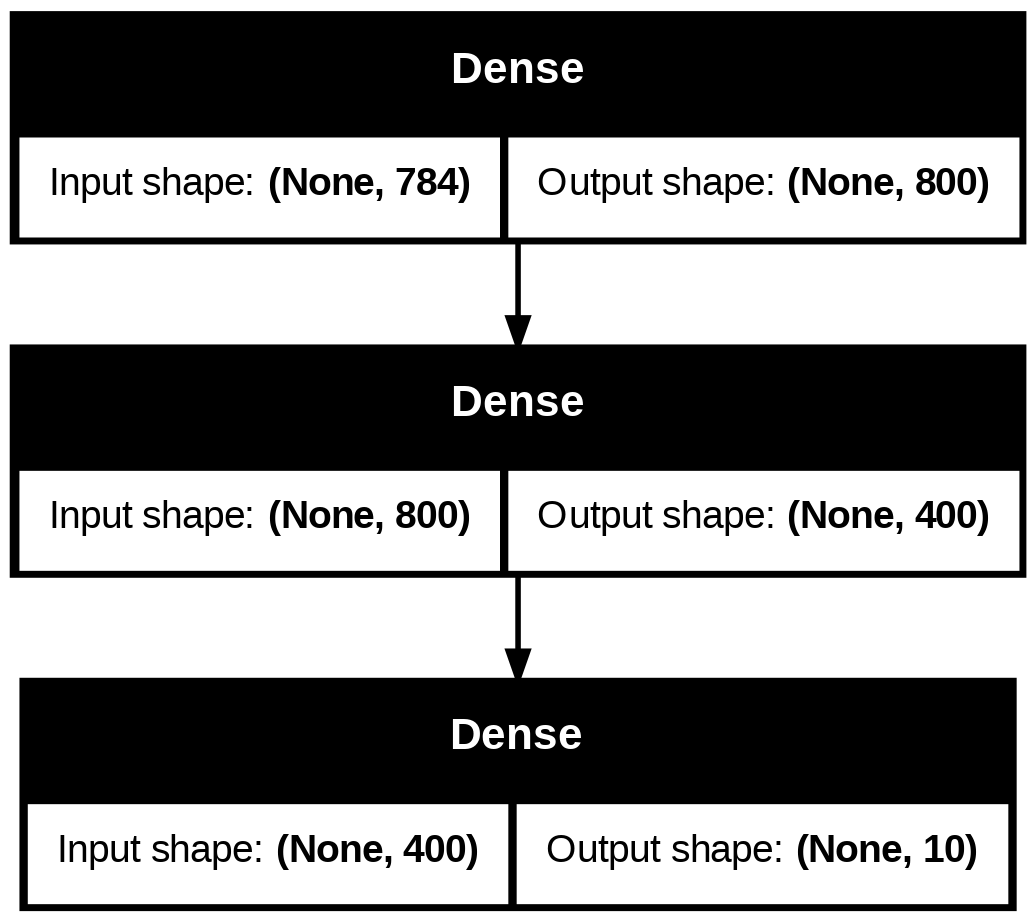

In [53]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [54]:
history = model.fit(x_train, y_train, batch_size=16000, epochs=15, verbose=1)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3876 - loss: 2.0064
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8165 - loss: 0.8220
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8751 - loss: 0.4351
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8976 - loss: 0.3513
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9120 - loss: 0.3072
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9238 - loss: 0.2704
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9318 - loss: 0.2389
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9386 - loss: 0.2152
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9443 - loss: 0.1959
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9479 - loss: 0.1817
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9520 - loss: 0.1661
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9557 - loss: 0.1541
Epoch 13/15
4/4 ━━

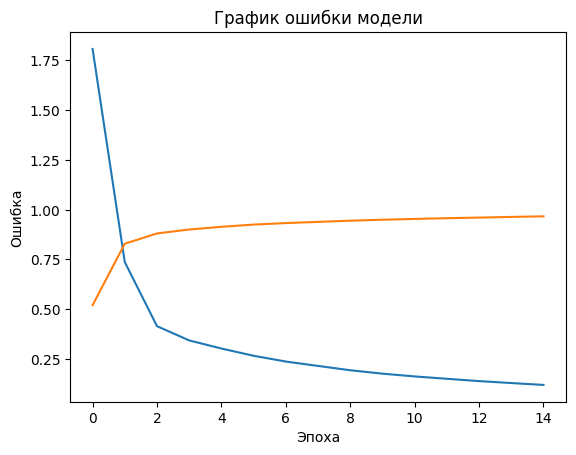

In [55]:
loss = history.history['loss']
accuracy = history.history['accuracy']
# Создание графика ошибки
plt.plot(loss)
plt.plot(accuracy)
plt.title('График ошибки модели')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка и точность')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


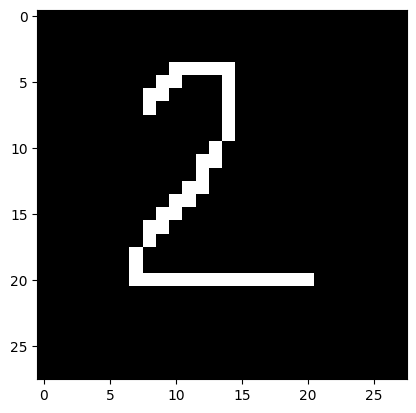

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[4.0863186e-02 5.0686516e-02 4.1864648e-01 7.6414399e-02 3.2188848e-03
  2.0497923e-01 1.9960967e-01 4.6958827e-04 4.9088076e-03 2.0325194e-04]]
Most likely class: 2


In [57]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab import drive # import the google.colab module

# Mount Google Drive
drive.mount('/content/drive')

# Load the image, providing the full path to the file in your Google Drive
img = Image.open('/content/drive/MyDrive/2.png').convert('L') # Change 'MyDrive' to your Drive's folder name if different

# Convert the image to a NumPy array
img = np.array(img)

# Resize the image to 28x28 pixels
img = img.reshape(28, 28)

# Normalize the image
img = img.astype('float32') / 255.0

# Display the image
plt.imshow(img, cmap='gray')
plt.show()

# Convert the image to a vector
img = img.reshape(1, 784)

# Make a prediction using the model
predictions = model.predict(img)

# Print the predictions
print(predictions)

# Print the most likely class
predicted_class = np.argmax(predictions)
print('Most likely class:', predicted_class)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 10)                  │           3,930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 927,090 (3.54 MB)

 Trainable params: 927,090 (3.54 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0895 - loss: 2.3228
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.5567 - loss: 1.9157
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.7274 - loss: 1.5654
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.7956 - loss: 1.2404
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.8236 - loss: 0.9658
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8344 - loss: 0.7602
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.8455 - loss: 0.6186
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8570 - loss: 0.5223
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.8688 - loss: 0.4607
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.8780 - loss: 0.4198
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8843 - loss: 0.3916
Epoch 12/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.8899 - loss: 0.3711
Epoch 13

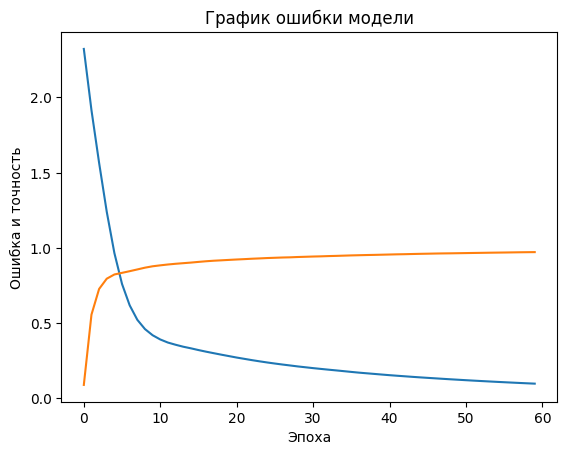

In [78]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(784, input_dim=784, activation='relu'))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(392, activation='relu'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(10, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)
historymy = model.fit(x_train, y_train, batch_size=60000, epochs=60, verbose=1)
loss = historymy.history['loss']
accuracy = historymy.history['accuracy']
# Создание графика ошибки
plt.plot(loss)
plt.plot(accuracy)
plt.title('График ошибки модели')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка и точность')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter the file name (e.g., 2): 3


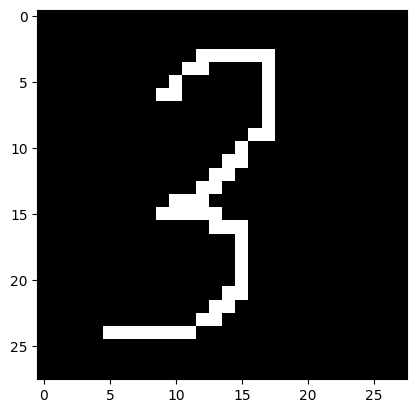

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[6.8174093e-05 8.5886242e-04 8.8745425e-04 9.9433112e-01 8.0683654e-05
  2.5081881e-03 7.9839614e-05 5.1347950e-05 1.0931103e-03 4.1299310e-05]]
Most likely class: 3


In [83]:
# Mount Google Drive
drive.mount('/content/drive')

# Get file name from user input
file_name = input("Enter the file name (e.g., 2): ")

# Load the image, using the file name entered by the user
img = Image.open('/content/drive/MyDrive/MNISTMy/' + file_name + '.png').convert('L')

# Convert the image to a NumPy array
img = np.array(img)

# Resize the image to 28x28 pixels
img = img.reshape(28, 28)

# Normalize the image
img = img.astype('float32') / 255.0

# Display the image
plt.imshow(img, cmap='gray')
plt.show()

# Convert the image to a vector
img = img.reshape(1, 784)

# Make a prediction using the model
predictions = model.predict(img)

# Print the predictions
print(predictions)

# Print the most likely class
predicted_class = np.argmax(predictions)
print('Most likely class:', predicted_class)